<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#General-feedback" data-toc-modified-id="General-feedback-0.1"><font color="orange">General feedback</font></a></span></li></ul></li><li><span><a href="#Goal" data-toc-modified-id="Goal-1">Goal</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-2">Data description</a></span></li><li><span><a href="#Feature-naming" data-toc-modified-id="Feature-naming-3">Feature naming</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-4">Imports</a></span></li><li><span><a href="#Input-data" data-toc-modified-id="Input-data-5">Input data</a></span></li><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-6">Descriptive statistics</a></span></li><li><span><a href="#Recovery-calculation-check" data-toc-modified-id="Recovery-calculation-check-7">Recovery calculation check</a></span></li><li><span><a href="#Missing-features-analysis" data-toc-modified-id="Missing-features-analysis-8">Missing features analysis</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-9">Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Data-type-change" data-toc-modified-id="Data-type-change-9.1">Data type change</a></span></li><li><span><a href="#Test-targets" data-toc-modified-id="Test-targets-9.2">Test targets</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-9.3">Missing values</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-9.4">Duplicates</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-10">EDA</a></span><ul class="toc-item"><li><span><a href="#Concentrations-of-metals" data-toc-modified-id="Concentrations-of-metals-10.1">Concentrations of metals</a></span></li><li><span><a href="#Feed-particle-size-comparison" data-toc-modified-id="Feed-particle-size-comparison-10.2">Feed particle size comparison</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-10.3">Outliers</a></span></li><li><span><a href="#Target-analysis" data-toc-modified-id="Target-analysis-10.4">Target analysis</a></span></li></ul></li><li><span><a href="#Common-columns" data-toc-modified-id="Common-columns-11">Common columns</a></span></li><li><span><a href="#Standard-scaling" data-toc-modified-id="Standard-scaling-12">Standard scaling</a></span></li><li><span><a href="#Evaluation-metric" data-toc-modified-id="Evaluation-metric-13">Evaluation metric</a></span></li><li><span><a href="#Model-selection" data-toc-modified-id="Model-selection-14">Model selection</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-15">Hyperparameter tuning</a></span></li><li><span><a href="#Test-the-model" data-toc-modified-id="Test-the-model-16">Test the model</a></span></li><li><span><a href="#Feature-importances" data-toc-modified-id="Feature-importances-17">Feature importances</a></span></li><li><span><a href="#Sanity-check" data-toc-modified-id="Sanity-check-18">Sanity check</a></span></li></ul></div>

## Goal

Develop a machine learning model for Zyfra, efficiency solutions for heavy industry company, that would analyze data on extraction and purification of gold from an ore and predict the amount of recovered gold. The model will help to optimize the production and eliminate unprofitable parameters.

## Data description

**Technological process**

- *Rougher feed* — raw material
- *Rougher additions* (or *reagent additions*) — flotation reagents: *Xanthate, Sulphate, Depressant*
    - *Xanthate* — promoter or flotation activator;
    - *Sulphate* — sodium sulphide for this particular process;
    - *Depressant* — sodium silicate.
- *Rougher process* — flotation
- *Rougher tails* — product residues
- *Float banks* — flotation unit
- *Cleaner process* — purification
- *Rougher Au* — rougher gold concentrate
- *Final Au* — final gold concentrate

**Parameters of stages**

- *air amount — volume of air*
- *fluid levels*
- *feed size* — feed particle size
- *feed rate*

## Feature naming

Here's how we name the features:

`[stage].[parameter_type].[parameter_name]`

Example: `rougher.input.feed_ag`

Possible values for `[stage]`:

- *rougher —* flotation
- *primary_cleaner* — primary purification
- *secondary_cleaner* — secondary purification
- *final* — final characteristics

Possible values for `[parameter_type]`:

- *input* — raw material parameters
- *output* — product parameters
- *state* — parameters characterizing the current state of the stage
- *calculation —* calculation characteristics

## Imports

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler as ss

from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

pd.set_option('display.max_rows', None, 'display.max_columns', None)

print("Setup Complete")

Setup Complete


## Input data

In [2]:
try:
    df_train = pd.read_csv('C:/Users/anna/Desktop/DS Yandex/IntegratedProject2/gold_recovery_train.csv')
    df_test = pd.read_csv('C:/Users/anna/Desktop/DS Yandex/IntegratedProject2/gold_recovery_test.csv')
    df_full = pd.read_csv('C:/Users/anna/Desktop/DS Yandex/IntegratedProject2/gold_recovery_full.csv')
    
except:
    df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

## Descriptive statistics

In [3]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [4]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

Notes for preprocessing:
- All features are numerical, except for the `date` variable.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

Notes for preprocessing:
- There are 16860 observations in the train set and 5856 observations in the test set, so the test set is around 26% of the full dataset;
- There are 87 features in the train set and only 53 features in the test set. Some parameters are not available in the test set because they were measured and/or calculated much later. We will analyze this point further in more detail;
- There are 2 target variables: `rougher.output.recovery` and `final.output.recovery`;
- Each feature data type is float except for the `date` column, it should be converted to datetime format;
- There are quite a few missing values to fill.

## Recovery calculation check

Let's use the following formula to check whether `rougher.output.recovery` was calculated correctly in the train set:

Recovery = (Cx(F-T) / Fx(C-T)) x 100%

where:

- *C* — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)
- *F* — share of gold in the feed before flotation (for finding the rougher concentrate recovery)
- *T* — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)

<a href="https://www.codecogs.com/eqnedit.php?latex=Recovery&space;=&space;(Cx(F-T)&space;/&space;Fx(C-T))&space;x&space;100%" target="_blank"><img src="https://latex.codecogs.com/gif.latex?Recovery&space;=&space;(Cx(F-T)&space;/&space;Fx(C-T))&space;x&space;100%" title="Recovery = (Cx(F-T) / Fx(C-T)) x 100%" /></a>

<a href="https://www.codecogs.com/eqnedit.php?latex=Recovery&space;=&space;\frac{C\cdot&space;(F&space;-&space;T)}{F\cdot&space;(C&space;-&space;T)}\cdot&space;100%" target="_blank"><img src="https://latex.codecogs.com/gif.latex?Recovery&space;=&space;\frac{C\cdot&space;(F&space;-&space;T)}{F\cdot&space;(C&space;-&space;T)}\cdot&space;100%" title="Recovery = \frac{C\cdot (F - T)}{F\cdot (C - T)}\cdot 100%" /></a>

In [7]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

df_train['recovery_calc'] = (100* ((C*(F-T)) / (F*(C-T)))).round(6)

In [8]:
df_train[['recovery_calc', 'rougher.output.recovery']][0:5]

,recovery_calc,rougher.output.recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


The first 5 rows are identical, let's calculate MAE to make sure it holds for all observations.

In [9]:
MAE = (df_train['recovery_calc'] - df_train['rougher.output.recovery']).abs().mean()
print(f'MAE of recovery calulation: {MAE}')

MAE of recovery calulation: 2.4482453097445186e-07


The MAE shows that the `rougher.output.recovery` was calculated correctly.

## Missing features analysis

In [10]:
missing_col = list(set(df_train.columns)-set(df_test.columns))
sorted(missing_col)

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery_calc',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 

The missing features are directly connected to the target variables (types **output** and **calculation**). It's only logical that they are not included in the test set as we are developing a model precisely to predict those 2 targets.

In order to be able to use an ML model, we need to remove these extra features from the train set, so that both train and test set have the same shapes.

## Preprocessing

### Data type change
As mentioned above, let's convert the `date` column into the datetime type.

In [11]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

### Test targets

Let's use the full dataset to extract test targets and include them in the test set to be able to compare our predictions to the actual values.

In [12]:
df_full['date'] = pd.to_datetime(df_full['date'])

In [13]:
df_test = df_test.merge(df_full[['date', 'final.output.recovery', 'rougher.output.recovery']], 
                        how='left', on='date')

### Missing values

In [14]:
df_train.isnull().sum().mean()/len(df_train)

0.021974414968187212

In [15]:
df_test.isnull().sum().mean()/len(df_test)

0.010394932935916543

In [16]:
df_train.isnull().mean().sort_values(ascending=False).head(10)

rougher.output.recovery               0.152610
recovery_calc                         0.135409
rougher.output.tail_ag                0.133452
rougher.output.tail_sol               0.133393
rougher.output.tail_au                0.133393
secondary_cleaner.output.tail_sol     0.117794
rougher.input.floatbank11_xanthate    0.112930
final.output.recovery                 0.090214
primary_cleaner.input.sulfate         0.077521
primary_cleaner.input.depressant      0.074852
dtype: float64

In [17]:
df_test.isnull().mean().sort_values(ascending=False).head(10)

rougher.output.recovery               0.093238
final.output.recovery                 0.075478
rougher.input.floatbank11_xanthate    0.060280
primary_cleaner.input.sulfate         0.051571
primary_cleaner.input.depressant      0.048497
rougher.input.floatbank10_sulfate     0.043887
primary_cleaner.input.xanthate        0.028347
rougher.input.floatbank10_xanthate    0.021004
rougher.input.feed_sol                0.011441
rougher.input.floatbank11_sulfate     0.009392
dtype: float64

In [18]:
df_train = df_train.fillna(method='ffill').fillna(method='bfill')

In [19]:
df_test = df_test.fillna(method='ffill').fillna(method='bfill')

In [21]:
df_train.isnull().sum().sum()

0

In [22]:
df_train.shape

(16860, 88)

In [23]:
df_test.isnull().sum().sum()

0

In [24]:
df_test.shape

(5856, 55)

All missing values were filled using forward and backward fill in pandas dataframe (ffill and bfill)

### Duplicates
Let's check if any rows are duplicated.

In [25]:
df_train.duplicated().sum()

0

In [26]:
df_test.duplicated().sum()

0

## EDA
### Concentrations of metals
Let's see how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

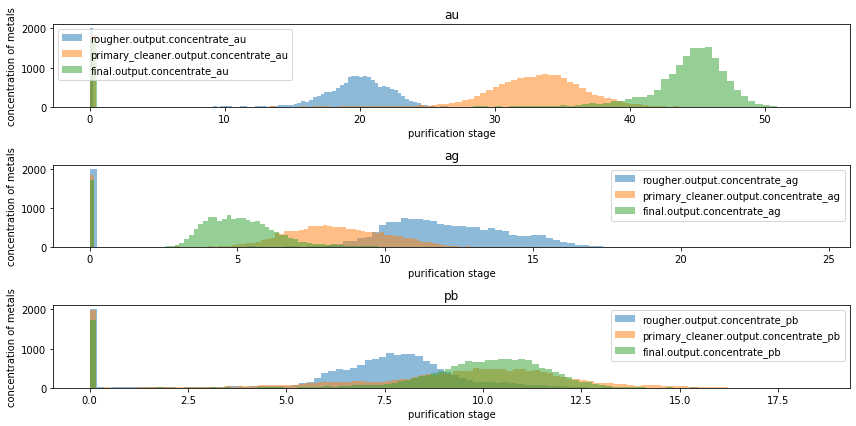

In [27]:
metals = ['au', 'ag', 'pb']
stages = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
plt.figure(figsize=(12,6))

for i,metal in enumerate(metals):
    for stage in stages:
        plt.subplot(3,1,i+1) 
        plt.hist(df_train[stage+'_'+metal], bins=100, label=stage+'_'+metal, alpha=.5);
    plt.title(metal)

    plt.legend()
    plt.xlabel("purification stage")
    plt.ylabel("concentration of metals")
    
plt.tight_layout()

First of all, we see around 2000 outliers for each metal and stage - values with 0 concentration of metals. We will need to remove them as they directly correlate with our targets.

As for the gold concentration (`au`), there is a clear trend towards quality improvement after each stage: the share of gold is higher and higher on average as we proceed with purification (from 20% to more than 45%, on average).

Interestingly, we see the opposite trend for silver concentration (`ag`): the more we purify the feed, the lower gets the share of this metal (from around 11% to less than 5%, on average).

As for the lead concentration (`pb`), we can say that there is probably no need for the second purification stage, as the quality of this metal doesn't improve, on average. However, we see a slight improvement after the first stage (from around 8% to almost 11%, on average). 

### Feed particle size comparison

Let's compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

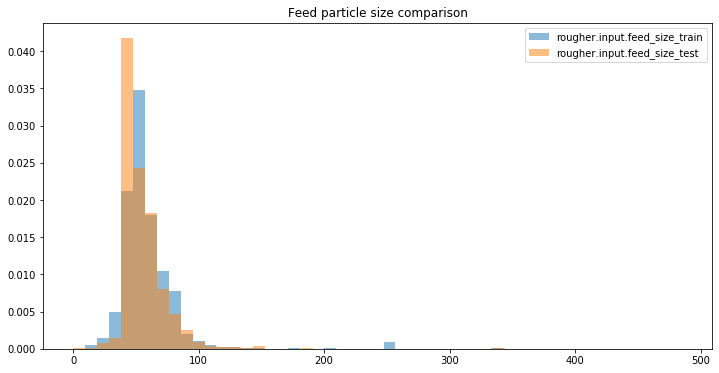

In [28]:
plt.figure(figsize=(12,6))
plt.hist(df_train['rougher.input.feed_size'],bins=50,label='rougher.input.feed_size_train',alpha=.5, density=1)
plt.hist(df_test['rougher.input.feed_size'],bins=50,label='rougher.input.feed_size_test',alpha=.5, density=1)
plt.legend()
plt.title('Feed particle size comparison');

The two distributions are very close to each other, which means that we will not have a problem of applying a model trained on the train set to the test set.

In [29]:
average_particle_train = df_train['rougher.input.feed_size'].mean()
average_particle_test = df_test['rougher.input.feed_size'].mean()

In [30]:
print("Average particle train size", average_particle_train)
print("Average particle test size", average_particle_test)

Average particle train size 60.1885953360163
Average particle test size 55.89886568885056


### Outliers
Let's remove the outliers in the target variables. We will first transform any 0 values to NaNs and then drop them from the data sets because there amount is insignificant.

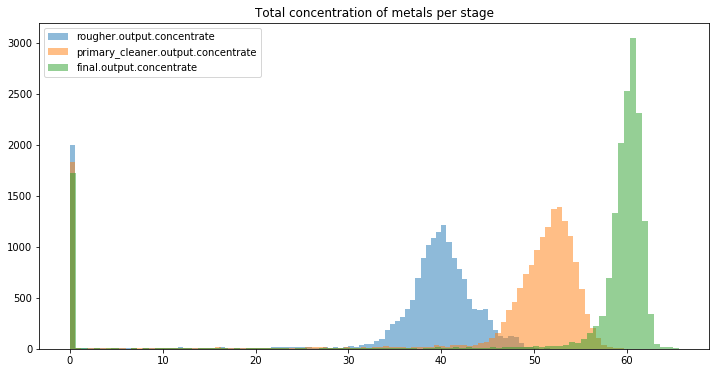

In [31]:
plt.figure(figsize=(12,6))

for stage in stages:
    df_train[stage+'_all_metals'] = 0
    for metal in metals:
        df_train[stage+'_all_metals'] += df_train[stage+'_'+metal]
    plt.hist(df_train[stage+'_all_metals'], bins=100, label=stage, alpha=.5)
    plt.title('Total concentration of metals per stage')
    plt.legend();

We can see that the total concentration of metals per stage does get better, on average.

Just as before we see multiple outliers around 0, let's remove them.

In [32]:
for i,metal in enumerate(metals):
    for stage in stages:
        df_train[df_train[stage+'_'+metal]<0.01] = np.nan
df_train = df_train.dropna(how='any', axis=0)

In [33]:
df_train.isnull().sum().sum()

0

In [34]:
df_train.shape

(14347, 91)

### Target analysis
Finally, let's analyze our targets.

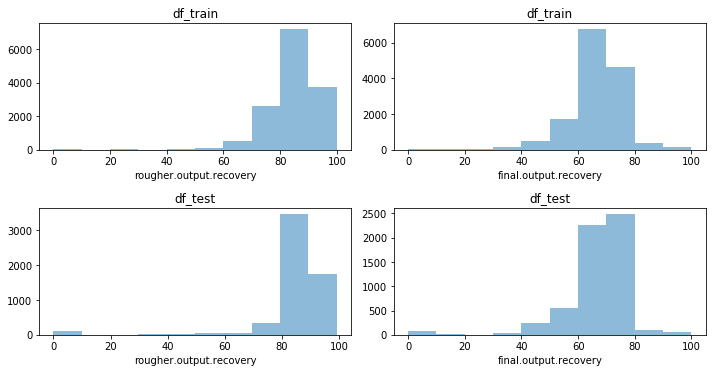

In [35]:
targets = ['rougher.output.recovery', 'final.output.recovery']
dfs = [df_train, df_test]
df_train.name = 'df_train'
df_test.name = 'df_test'

plt.figure(figsize=(10,10))
c=1
for i, df in enumerate(dfs):
    for target in targets:
        plt.subplot(4,2,c)
        plt.hist(df[target], alpha=.5)
        plt.title(df.name)
        plt.xlabel(target)
        c = c + 1
plt.tight_layout()

Train distribution looks ok, both targets in the test set have outliers around 0, let's remove them.

In [36]:
for target in targets:
    df_test[df_test[target]<0.01] = np.nan
    
df_test = df_test.dropna(how='any', axis=0)

In [37]:
df_test.isnull().sum().sum()

0

In [38]:
df_test.shape

(5678, 55)

## Common columns
In the end, we will get rid of extra features in the train set.

In [39]:
common_columns =  list(set(df_train.columns).intersection(set(df_test.columns)))
df_train_filtered = df_train[common_columns]
df_train_filtered[['rougher.output.recovery', 'final.output.recovery']] = df_train[['rougher.output.recovery', 'final.output.recovery']]

## Standard scaling
Let's scale the features before modeling to be able to compare their coefficients in the later sections.

In [40]:
X_train = df_train_filtered.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
X_test =  df_test.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
y_train = df_train_filtered[['rougher.output.recovery', 'final.output.recovery']].values
y_test = df_test[['rougher.output.recovery', 'final.output.recovery']].values

sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Evaluation metric

Let's write a function to calculate the final sMAPE value. 

**sMAPE** is a symmetric Mean Absolute Percentage Error.

It is similar to MAE, but is expressed in relative values instead of absolute ones. It equally takes into account the scale of both the target and the prediction.

Here’s how *sMAPE* is calculated:

![sMAPE](https://github.com/annapmp/Gold-recovery-prediction/blob/main/sMAPE.png?raw=true)

Denotation:

- Value of target for the observation with the *i* index in the sample used to measure quality.
- Value of prediction for the observation with the *i* index, for example, in the test sample.
- Number of observations in the sample.
- Summation over all observations of the sample (***i*** takes values from 1 to *N*).

We need to predict two values:

1. rougher concentrate recovery `rougher.output.recovery`
2. final concentrate recovery `final.output.recovery`

**The final metric** includes the two values:

![final_sMAPE](https://github.com/annapmp/Gold-recovery-prediction/blob/main/Final_sMAPE.png?raw=true)

In [41]:
def smape(y_true, y_pred):
    return (np.abs(y_true-y_pred)/((np.abs(y_true) + np.abs(y_pred))/2)).mean()

In [42]:
def smape_final(y_true,y_pred):
    smape_rougher = smape(y_true[:,0], y_pred[:,0])
    smape_final = smape(y_true[:,1], y_pred[:,1])
    return 0.25*smape_rougher + 0.75*smape_final

## Model selection

Now let's train our models on the train set and select the best model using the cross-validation technique.

In [43]:
LR = LinearRegression()
DT = DecisionTreeRegressor(random_state=12345)
RF = RandomForestRegressor(random_state=12345)
Lasso = linear_model.Lasso()
Ridge = linear_model.Ridge()
base_model = DummyRegressor(strategy='mean')

In [44]:
def crossval(model, X_train, y_train, cv):
    smape_score = make_scorer(smape_final)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=smape_score)
    return scores.mean()

In [45]:
smape_final_Lasso = crossval(Lasso, X_train, y_train, 5)
smape_final_Ridge = crossval(Ridge, X_train, y_train, 5)
smape_final_LR = crossval(LR, X_train, y_train, 5)
smape_final_DT = crossval(DT, X_train, y_train, 5)
smape_final_RF = crossval(RF, X_train, y_train, 5)
smape_final_base = crossval(base_model, X_train, y_train, 5)

In [46]:
models = pd.DataFrame({
    'Model': ['Baseline', 'LR', 'DT', 'RF', 'Lasso', 'Ridge'],
    'Score': [smape_final_base, smape_final_LR, smape_final_DT, smape_final_RF, smape_final_Lasso, smape_final_Ridge]})
sorted_by_score = models.sort_values(by='Score', ascending=False)

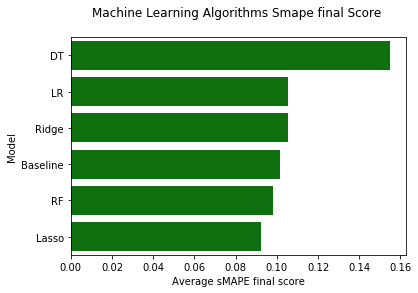

In [47]:
sns.barplot(x='Score', y = 'Model', data = sorted_by_score, color = 'g')
plt.title('Machine Learning Algorithms Smape final Score \n')
plt.xlabel('Average sMAPE final score')
plt.ylabel('Model');

Lasso regression model shows the best average score. Let's try to tune its hyperparameters.

---

## Hyperparameter tuning

In [48]:
d = []
for alpha in np.arange(0.1,1,0.1):
    for tol in [0.01, 0.05, 0.001]:
        for max_iter in (100, 500, 1000):
            Lasso = linear_model.Lasso(alpha=alpha, tol=tol, max_iter=max_iter)
            smape_final_Lasso = crossval(Lasso, X_train, y_train, 5)
            d.append(
            {
                'alpha': alpha,
                'tol': tol,
                'max_iter': max_iter,
                'smape_final_Lasso':  smape_final_Lasso
            }
            )
        
best_param = pd.DataFrame(d).nlargest(1, ['smape_final_Lasso'], keep='first')
smape_final_RF = best_param['smape_final_Lasso'].values
best_param

,alpha,tol,max_iter,smape_final_Lasso
0,0.1,0.01,100,0.093763


## Test the model

In [49]:
Lasso = linear_model.Lasso(alpha=0.1, tol=0.001, max_iter=100)
Lasso.fit(X_train, y_train)
y_pred = Lasso.predict(X_test)
smape_final(y_test, y_pred)

1.8185331076931617

The test score is pretty bad even after hyper parameters tuning. The model seems to be overfitted to the train set. Let's try feature selection to reduce overfitting.

---

## Feature importances

One of the goals of this report is to eliminate unprofitable features. We can do that by comparing feature importances.

In [50]:
LR.fit(X_train, y_train)
coeff_df = pd.DataFrame()
coeff_df['Feature'] = df_train_filtered.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1).columns.values
coeff_df["Correlation"] = pd.Series(LR.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
44,rougher.state.floatbank10_f_air,2.798929
3,rougher.input.feed_sol,2.331558
10,rougher.input.floatbank10_xanthate,2.069115
36,secondary_cleaner.state.floatbank4_a_level,1.972594
32,rougher.state.floatbank10_a_level,1.963794
18,primary_cleaner.input.sulfate,1.742084
8,secondary_cleaner.state.floatbank5_a_air,1.691105
50,secondary_cleaner.state.floatbank2_a_air,1.526262
37,primary_cleaner.state.floatbank8_b_air,1.429936
29,rougher.state.floatbank10_c_level,1.350171


From the above table we can see that `rougher.state.floatbank10_f_air` has the highest impact on the target variables. The features with scores close to 0 have almost no impact on the targets and can be eliminated.

In [51]:
profitable_params = coeff_df.loc[abs(coeff_df["Correlation"]) > 0.1 , 'Feature']

In [52]:
df_train_params = df_train_filtered[profitable_params]
df_test_params = df_test[profitable_params]

df_train_params[['rougher.output.recovery', 'final.output.recovery']] = df_train_filtered[['rougher.output.recovery', 'final.output.recovery']]
df_test_params[['rougher.output.recovery', 'final.output.recovery']] = df_test[['rougher.output.recovery', 'final.output.recovery']]


In [53]:
X_train = df_train_params.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
X_test =  df_test_params.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_train = df_train_params[['rougher.output.recovery', 'final.output.recovery']].values
y_test = df_test_params[['rougher.output.recovery', 'final.output.recovery']].values

sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
Lasso = linear_model.Lasso(alpha=0.1, tol=0.001, max_iter=100)
Lasso.fit(X_train, y_train)
y_pred = Lasso.predict(X_test)
smape_final_score = smape_final(y_test, y_pred)
smape_final_score

0.08686861820512749

## Sanity check

Let's calculate the test baseline score to perform this check.

In [55]:
base_model = DummyRegressor(strategy='mean')
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)
smape_final_base = smape_final(y_test, y_pred)
smape_final_base

0.09583114141226579

In [56]:
print(round((smape_final_base - smape_final_score)/smape_final_base,2)*100,'%')

9.0 %


Lasso model cross-validation score is lower than the baseline score by 9%.

---

# Conclusion

In this project  have developed a machine learning model for Zyfra, efficiency solutions for heavy industry company, that analyzes data on extraction and purification of gold from an ore and predicts the amount of recovered gold. The model helps to eliminate unprofitable parameters.

First of all, I have familiarized ourselves with the data by performing the descriptive statistics. I found missing values, wrong `date` column data type. 

Next, I've checked the recovery calculation in the dataset. It turned out to be performed correctly as the MAE value between the `rougher.output.recovery` column. 

I found that some features are missing from the test set as they are directly connected to the target variables (types output and calculation).

In the preprocessing step I have converted `date` column data type to datetime, filled missing tenure values with the mean per each column and checked for duplicated values. In order to be able to use an ML model, removed those extra features from the train set, so that both train and test set have the same shapes.
 
In the following section I have performed **EDA** and reached the following conclusions:

- As for the gold concentration (au), there is a clear trend towards quality improvement after each stage: the share of gold is higher and higher on average as we proceed with purification (from 20% to more than 45%, on average).

- We see the opposite trend for silver concentration (ag): the more we purify the feed, the lower gets the share of this metal (from around 11% to less than 5%, on average).

- As for the lead concentration (pb), we can say that there is probably no need for the second purification stage, as the quality of this metal doesn't improve, on average. However, we see a slight improvement after the first stage (from around 8% to almost 11%, on average).

- The train and test distributions of feed particle sizes are very close to each other, which means that we will not have a problem of applying a model trained on the train set to the test set.

- I found some outliers in the target variables and removed them.

In the next step I've developed and tested, using cross-validation, several ML algorithms and tuned the best model's hyperparameters. Lasso regression model showed the lowest score. 

The selected model appeared to be overfitting to the train set, so I decided to implement feature selection method to reduce the overfitting. I have measured feature importances using the coefficients from the Linear Regression model and identified the most profitable parameters.

Then I have tested our model on the test set. I've reached 6.8% error rate on the test set.

Finally, I checked the model for sanity by comparing the final score to the baseline score. The final score of our model is lower (by 9%) than the baseline score.